Import libraries

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

Read in dataframe

In [3]:
df = pd.read_csv("franchises_combined_by_year.csv", index_col = 0)

In [4]:
df.sample()

,franchise_name,franchise_id,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes
5846,Contra,3025-605,game,tt10284164,Operation C,1991,0,NaN,"["" 'Action'"", "" 'Sci-Fi']"", "" 'Shooter'"", ""['A...",25.0,7.0,15.0,1.0,3.0,18.0,0.1,0.0,-0.093317,-0.248558


This gets the first and last year of the franchise, creates columns and then gives the relative position of each release in the franchise as a percentage

In [5]:
df = df.groupby('franchise_id').agg(min_year=('year', 'min'), max_year=('year', 'max')) \
       .reset_index() \
       .merge(df, on='franchise_id', how='right') \
       .assign(position_in_franchise=lambda x: (x['year'] - x['min_year']) / (x['max_year'] - x['min_year']) * 100)


This gets the highest and lowest vote of the franchise and creates columns

In [6]:
df = df.groupby('franchise_id').agg(min_vote=('votes_average', 'min'), max_vote=('votes_average', 'max')) \
       .reset_index() \
       .merge(df, on='franchise_id', how='right')


This gets the highest and lowest rating of the franchise and creates columns

In [7]:
df = df.groupby('franchise_id').agg(min_rating=('rating_average', 'min'), max_rating=('rating_average', 'max')) \
       .reset_index() \
       .merge(df, on='franchise_id', how='right')


Find the biggest gap in releases for each franchise

In [8]:
df = df.groupby('franchise_id').agg(biggest_gap_in_releases=('year_diff', 'max')) \
       .reset_index() \
       .merge(df, on='franchise_id', how='left')

In [9]:
df.sample()

,franchise_id,biggest_gap_in_releases,min_rating,max_rating,min_vote,max_vote,min_year,max_year,franchise_name,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,position_in_franchise
9984,f557,25.0,4.2,6.8,20.0,1697.0,1946,2009,Dr. Orloff,movie,tt0060373,only a coffin,1967,0,89,"['Horror', 'Crime']",72.0,4.6,10.0,1.0,1.0,-1050.0,-2.0,0.0,-1.22793,-0.330989,33.333333


We can see how long the average franchise runs for:

[Text(0.5, 1.0, 'Total franchise distribution'),
 Text(0.5, 0, 'Number of releases in the franchise'),
 Text(0, 0.5, 'Total franchises')]

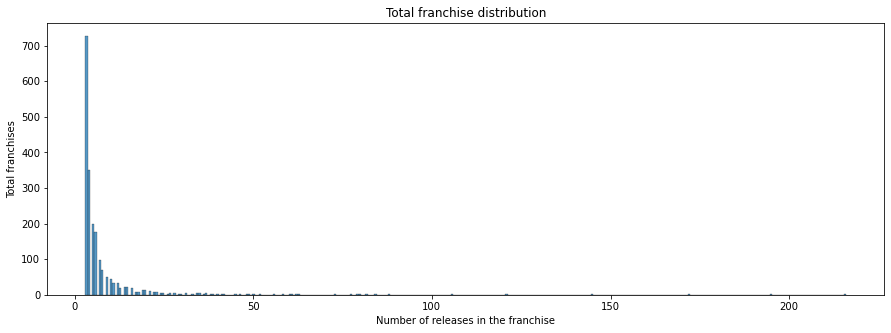

In [10]:
plt.figure(figsize=(15, 5))
sns.histplot(data = df.groupby('franchise_id')['franchise_count'].first().reset_index(), \
             x='franchise_count').set(title = 'Total franchise distribution', xlabel = 'Number of releases in the franchise', ylabel = "Total franchises")

That's pretty unclear so we can divide the data to make it clearer.

[Text(0.5, 1.0, 'Total franchise distribution'),
 Text(0.5, 0, 'Number of releases in the franchise'),
 Text(0, 0.5, 'Total franchises')]

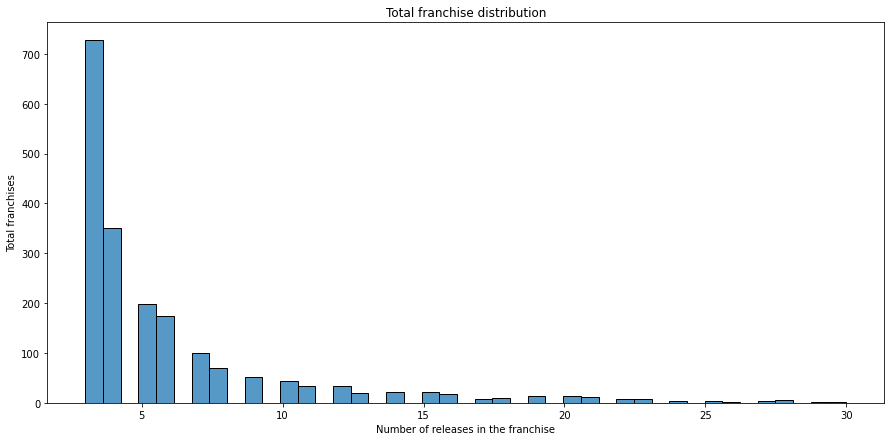

In [11]:
plt.figure(figsize=(15, 7))
sns.histplot(data = df[df['franchise_count'] <= 30].groupby('franchise_id')['franchise_count'].first().reset_index(), \
             x='franchise_count').set(title = 'Total franchise distribution', xlabel = 'Number of releases in the franchise', ylabel = "Total franchises")

We can get a count for the number of franchises in our dataset, and how many of these are games vs movies

In [ ]:
print("Unique franchise ids: ", df.franchise_id.nunique(),
      "\nMovie franchises: ", df[df["type"]=="movie"].franchise_id.nunique(), 
      "\nGame franchises: ", df[df["type"]=="game"].franchise_id.nunique())

In [ ]:
df[df['franchise_id'] == '3025-1403'].plot("year", "rating_average")

In [ ]:
plt.figure(figsize=(15,10))
df[df['franchise_count'] < 6].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 6')
df[(df['franchise_count'] >= 6) & (df['franchise_count'] < 9)].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 22')
df[(df['franchise_count'] >= 9) & (df['franchise_count'] < 12)].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 22')
df[df['franchise_count'] >= 12].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 22')
sns.regplot(data=df, x='year', y='rating_diff', order=1, scatter=False)

#df[df['franchise_count'] == 8].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 8')
#df[df['franchise_count'] == 7].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 7')
#df[df['franchise_count'] == 6].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 6')
#df[df['franchise_count'] == 5].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 8')
#df[df['franchise_count'] == 4].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 7')


In [ ]:
plt.figure(figsize=(15,10))
df[df['franchise_count'] < 6].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 6')
df[(df['franchise_count'] >= 6) & (df['franchise_count'] < 9)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 22')
df[(df['franchise_count'] >= 9) & (df['franchise_count'] < 12)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 22')
df[df['franchise_count'] >= 12].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 22')
sns.regplot(data=df, x='year', y='rating_average', order=1, scatter=False)


In [ ]:
df[(df['type'] == "movie")&(df['franchise_count'] >= 12)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 22')

In [ ]:
plt.figure(figsize=(15,10))
df[(df['type'] == "movie")&(df['franchise_count'] < 6)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 6')
df[(df['type'] == "movie")&(df['franchise_count'] >= 6) & (df['franchise_count'] < 9)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 22')
df[(df['type'] == "movie")&(df['franchise_count'] >= 9) & (df['franchise_count'] < 12)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 22')
df[(df['type'] == "movie")&(df['franchise_count'] >= 12)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 22')
sns.regplot(data=df, x='year', y='rating_average', order=1, scatter=False)


In [ ]:
plt.figure(figsize=(15,10))
df[(df['type'] == "game")&(df['franchise_count'] < 6)].groupby('year')['rating_average'].mean().plot(label='Franchise Count < 6')
df[(df['type'] == "game")&(df['franchise_count'] >= 6) & (df['franchise_count'] < 9)].groupby('year')['rating_average'].mean().plot(label='Franchise Count < 9')
df[(df['type'] == "game")&(df['franchise_count'] >= 9) & (df['franchise_count'] < 12)].groupby('year')['rating_average'].mean().plot(label='Franchise Count < 12')
df[(df['type'] == "game")&(df['franchise_count'] >= 12)].groupby('year')['rating_average'].mean().plot(label='Franchise Count > 12')
sns.regplot(data=(df[df['type'] == "game"]), x='year', y='rating_average', order=1, scatter=False)
plt.legend()

In [ ]:
plt.figure(figsize=(15,10))
df[df['franchise_count'] < 6].groupby('year')['votes_average'].mean().plot(label='Franchise Count = 6')
df[(df['franchise_count'] >= 6) & (df['franchise_count'] < 9)].groupby('year')['votes_average'].mean().plot(label='Franchise Count = 7')
df[(df['franchise_count'] >= 9) & (df['franchise_count'] < 12)].groupby('year')['votes_average'].mean().plot(label='Franchise Count = 9')
df[df['franchise_count'] >= 12].groupby('year')['votes_average'].mean().plot(label='Franchise Count = 22')
sns.regplot(data=df, x='year', y='votes_average', order=1, scatter=False)
plt.legend()

In [ ]:
df.plot.scatter("biggest_gap_in_releases", "rating_average", figsize = (15,10))

In [ ]:
df.sample()

In [ ]:
df.plot.scatter("position_in_franchise", "votes_average", c=df['type'].map({'movie': 'green', 'game': 'red'}), alpha = 0.5, figsize = (15,10))
plt.yscale('log', base=10)

In [ ]:
df.plot.scatter("position_in_franchise", "rating_average", figsize = (15,10))

In [ ]:
df.sample()

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([df[df['type'] == 'movie']['rating_average'], df[df['type'] == "game"]['rating_average']])
ax.set_xticklabels(['Movie', 'Game'])
ax.set_ylabel('Average Rating')
ax.set_title('Standard Deviation of Average Rating')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([df[df['type'] == 'movie']['votes_average'], df[df['type'] == "game"]['votes_average']])
ax.set_xticklabels(['Movie', 'Game'])
ax.set_ylabel('Number of Votes')
ax.set_title('Standard Deviation of Number of Votes')
plt.show()

In [ ]:
df[df['type'] == "game"]['votes_average'].describe()

In [ ]:
df[df['type'] == "movie"]['votes_average'].describe()

We can look at the number of releases each franchise has

In [ ]:
bins =[2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 12.5, 15.5, 20.5, 250]
df['franchise_count_bin'] = pd.cut(df['franchise_count'], bins=bins, labels=["3", "4", "5", "6", "7", "8", "9", "10-12", "13-15", "16-20", "20+"])

In [ ]:
df.groupby('franchise_id')['franchise_count_bin'].first().value_counts().reset_index().plot(
    kind='bar', x='index', y='franchise_count_bin', xlabel = "Number of releases", ylabel = "Number of franchises", legend=False)

## Note:

This is taking me too long. All I want to do is sort the bins so they go in order but it's taking too long to try to figure out so I'll come back to it

Now I want to see whether the average rating for a franchise as a whole is affected by the number of elements in the franchise. I was going to just get an average based on the grouped years, but have realised that this will result in skewed data. Because we have already got an average for the year, we potentially have changed the weighting of certain movies, so if we try to get an average when we have already averaged some of them, it's going to create problems. Therefore I need to instead use the dataframe where the years were not merged.

In [ ]:
df_unmerged = pd.read_csv("franchises_complete_dataframe.csv", index_col = 0)
df_unmerged.tconst.count()

In [ ]:
df_unmerged.sample()

In [ ]:
df_unmerged = df_unmerged.groupby('franchise_id').agg(average_vote_franchise=('votes', 'mean'), average_rating_franchise=('rating', 'mean')) \
       .reset_index() \
       .merge(df_unmerged, on='franchise_id', how='right')

In [ ]:
df_unmerged = df_unmerged.groupby('franchise_id').agg(min_year=('year', 'min'), max_year=('year', 'max')) \
       .reset_index() \
       .merge(df_unmerged, on='franchise_id', how='right') \
       .assign(position_in_franchise=lambda x: (x['year'] - x['min_year']) / (x['max_year'] - x['min_year']) * 100)


In [ ]:
df_unmerged["Vote_relative_to_franchise_average"] = df_unmerged.apply(lambda row: (row["votes"] / row["average_vote_franchise"]) * 100, axis=1)

In [ ]:
df_unmerged.groupby('position_in_franchise')['Vote_relative_to_franchise_average'].mean().plot(kind='line', figsize=(15,10))
plt.xlabel('Position in Franchise')
plt.ylabel('Average Vote Relative to Franchise')
plt.title('Comparison of Average Vote Relative to Franchise by Position in Franchise')
plt.show()

In [ ]:
df_unmerged.plot.scatter("position_in_franchise", "Vote_relative_to_franchise_average")

## NEW DATAFRAME
Create a new dataframe with 1 entry per franchise. 

In [ ]:
new_df = df_unmerged.sort_values('year').groupby('franchise_id').agg({
    'franchise_name' : 'first',
    'type': 'first',
    'rating': 'mean',
    'votes': 'mean',
    'franchise_count': 'first',
    'year': ['first', 'last']
})

In [ ]:
new_df.sample()

In [ ]:
new_df[new_df['franchise_count'] == 25]

In [ ]:
def split_year(row):
    row['first_year'] = int(row['year']['first'])
    row['last_year'] = int(row['year']['last'])
    return row

new_df = new_df.apply(split_year, axis=1)
new_df = new_df[['franchise_name', 'type', 'rating', 'votes', 'franchise_count', 'first_year', 'last_year']]


In [ ]:
new_df["franchise_length"] = new_df.apply(lambda row: row["last_year"] - row["first_year"] +1, axis = 1)

In [ ]:
new_df.columns = new_df.columns.get_level_values(0)

In [ ]:
new_df["franchise_length"].describe()


In [ ]:
new_df["frequency_of_releases"] = new_df.apply(lambda row: row["franchise_count"] / row["franchise_length"], axis = 1)

In [ ]:
new_df[new_df['type']== 'game'].frequency_of_releases.describe()

In [ ]:
new_df[new_df['type']== 'movie'].frequency_of_releases.describe()

In [ ]:
new_df[new_df['type']== 'game'].plot.scatter("last_year", "frequency_of_releases")

In [ ]:
new_df[new_df['type']== 'movie'].plot.scatter("first_year", "frequency_of_releases")

In [ ]:
new_df[new_df['type']== 'game'].plot.scatter("franchise_count", "average_year_gap_per_release")

In [ ]:
new_df["average_year_gap_per_release"] = new_df.apply(lambda row: row["franchise_length"] / row["franchise_count"], axis = 1)

In [ ]:
new_df["average_year_gap_per_release"].describe()

In [ ]:
new_df.frequency_of_releases.describe()

In [ ]:
new_df[(new_df['frequency_of_releases']> 0.1) & (new_df["type"] == "movie")].plot.scatter("frequency_of_releases", 'rating')

In [ ]:
new_df.sort_values('franchise_length')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(
    x=new_df["franchise_length"],
    y=new_df["frequency"],
    c=new_df["rating"],
    cmap="coolwarm",
    alpha=0.7
)

# Add axis labels and a colorbar
ax.set_xlabel("Franchise Length (Years)")
ax.set_ylabel("Frequency")
cbar = fig.colorbar(scatter)
cbar.set_label("Rating")

plt.show()

In [ ]:
new_df[new_df['frequency_of_releases']>= 1].sort_values('frequency_of_releases', ascending = False).head(20)

In [ ]:
df

Now I have this, I can get the average rating and number of votes for each franchise, based on the number of elements in that franchise.

In [ ]:
bins =[2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 12.5, 15.5, 20.5, 250]
new_df['franchise_count_bin'] = pd.cut(new_df['franchise_count'],bins=bins, labels=["3", "4", "5", "6", "7", "8", "9", "10", "11-12", "13-15", "16-20", "21+"])

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df['franchise_count'].value_counts().sort_index().plot(title = "Number of elements in each franchise", xlabel = "Number of elements in franchise",ylabel = "Franchise count")
ax.set_xscale("log")

In [ ]:
new_df['franchise_count_bin'].value_counts().sort_index().plot(title = "Number of elements in each franchise", xlabel = "Number of elements in franchise",ylabel = "Number of franchises")

In [ ]:
bins =[2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 12.5, 15.5, 20.5, 250]
new_df['min_franchise_count'] = pd.cut(new_df['franchise_count'],bins=bins, labels=["3", "4", "5", "6", "7", "8", "9", "10", "11", "13", "16", "21"])

In [ ]:
new_df['min_franchise_count'] = new_df['min_franchise_count'].apply(lambda x: int(x))

In [ ]:
new_df.sort_values('min_franchise_count')

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x="min_franchise_count", y="votes", data=new_df, ax=ax)
sns.regplot(x="min_franchise_count", y="votes", data=new_df, ax=ax)
#new_df.boxplot(by = "franchise_count_bin", column = ["rating"], ax = ax)
ax.set_yscale('log')
ax.set_title("Franchise length vs Average Rating")
ax.set_xlabel("Releases in Franchise")

ax.set_ylabel("Average Votes")
plt.show()

In [ ]:
new_df.sample()

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x="min_franchise_count", y="rating", data=new_df, ax=ax)
sns.boxplot(x="min_franchise_count", y="rating", data=new_df, ax=ax)

#new_df.boxplot(by = "franchise_count_bin", column = ["rating"], ax = ax)
#ax.set_yscale('log')
ax.set_title("Franchise length vs Average Rating")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Rating")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="game"].boxplot(by = "franchise_count_bin", column = ["rating"], ax = ax)
#ax.set_yscale('log')
ax.set_title("Game Franchise length vs Average Rating")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Rating")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="movie"].boxplot(by = "franchise_count_bin", column = ["rating"], ax = ax)
#ax.set_yscale('log')
ax.set_title("Movie Franchise length vs Average Rating")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Rating")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df.boxplot(by = "franchise_count_bin", column = ["votes"], ax = ax)
ax.set_yscale('log')
ax.set_title("Franchise length vs Average Number of Votes")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Number of Votes")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="game"].boxplot(by = "franchise_count_bin", column = ["votes"], ax = ax)
ax.set_yscale('log')
ax.set_title("Game franchise length vs Average Number of Votes")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Number of Votes")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="movie"].boxplot(by = "franchise_count_bin", column = ["votes"], ax = ax)
ax.set_yscale('log')
ax.set_title("Movie Franchise length vs Average Number of Votes")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Number of Votes")
plt.show()

In [ ]:
new_df.boxplot(by = "franchise_count_bin", column = ["votes"], rot = 90, figsize=(10,10))

In [ ]:
df.sample()

In [ ]:
# Merge the mean ratings back into the original DataFrame
df_unmerged = pd.merge(df_unmerged, df_unmerged.groupby("franchise_id")["rating"].mean().reset_index(), on="franchise_id", suffixes=("", "_franchise_overall"))

# Rename the new column to "franchise_overall_rating"
#df_unmerged = df_unmerged.rename(columns={"rating_mean": "franchise_overall_rating"})


#df_unmerged["franchise_overall_rating"] = df_unmerged.groupby("franchise_id")["rating"].mean()

In [ ]:
df_unmerged.groupby('franchise_id')['rating_franchise_overall'].first().value_counts().sort_index()

In [ ]:
#bins =[1, 2.01, 3.01, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 12.5, 15.5, 20.5, 250]
df_unmerged['overall_franchise_rating_bins'] = pd.cut(df_unmerged['rating_franchise_overall'], bins=10)

In [ ]:
df_unmerged.groupby('franchise_id')['overall_franchise_rating_bins'].first().value_counts().sort_index().plot(
    kind='bar', x='index', y='rating_franchise_overall', xlabel = "Number of releases", ylabel = "Number of franchises", legend=False)

In [ ]:
df[df["type"]=="game"].franchise_id.nunique()

In [ ]:
df[df["type"]=="game"].franchise_count_bins.value_counts()

In [ ]:
df[df["type"]=="game"].boxplot(by = "franchise_count_bins", column = ["rating_average"], rot = 90, figsize=(10,10))

In [ ]:
df.plot.bar(x = df.rating_average)

In [ ]:
df.loc[df["type"] == "movie", 'z_rating'] = stats.zscore(df.loc[df["type"] == "movie", 'rating_average'])
df.loc[df["type"] == "game", 'z_rating'] = stats.zscore(df.loc[df["type"] == "game", 'rating_average'])
df.loc[df["type"] == "movie", 'z_votes'] = stats.zscore(df.loc[df["type"] == "movie", 'votes_average'])
df.loc[df["type"] == "game", 'z_votes'] = stats.zscore(df.loc[df["type"] == "game", 'votes_average'])

In [ ]:
df

Getting an overall picture of our data:

In [ ]:
df[df["type"] == "game"].votes_average.describe()

In [ ]:
df[df["type"] == "movie"].votes_average.describe()

In [ ]:
df.rating_average.describe()

In [ ]:
#df.groupby("type").year_diff.boxplot(rot = 90)
#df.groupby("type")[["year_diff"]].boxplot(rot=90)
df.groupby("type").plot(kind="box", rot=90)
